In [1]:
from datascience import *
%matplotlib inline
path_data = '../data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

# Decisions and Uncertainty

The statistical and computational methodology that we developed for assessing models about jury selection fit into a general framework of decision making called *statistical tests of hypotheses*. Using statistical tests as a way of making decisions is standard in many fields and has a standard terminology. 

In this section we will describe the general sequence of the steps used in statistical tests, along with some terminology. 

Though our example is from the biological sciences, you will see that the statistical and computational steps in the process are consistent with the corresponding steps in our analyses of data from the legal system. However, the biological data are about plants, not human beings and injustice. So the context and interpretation of the calculations below are far more simple.

[Gregor Mendel](https://en.wikipedia.org/wiki/Gregor_Mendel) (1822-1884) was an Austrian monk who is widely recognized as the founder of the modern field of genetics. Mendel performed careful and large-scale experiments on plants to come up with fundamental laws of genetics. 

Many of his experiments were on varieties of pea plants. He formulated sets of assumptions about each variety; these were his models. He then tested the validity of his models by growing the plants and gathering data.

For pea plants of a particular variety, Mendel proposed the following model.

## Mendel's Model ##
For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance that the flowers will be white, regardless of the colors in all the other plants.

To see whether his model was valid, Mendel grew 929 pea plants of this variety. Among these 929 plants, 705 had purple flowers.

We will use these data to perform a test of hypotheses and see if Mendel's model looks good.

## Step 1: The Hypotheses

All statistical tests attempt to choose between two views of the world. Specifically, the choice is between two views about how the data were generated. These two views are called *hypotheses*.

**The null hypothesis.** This is a clearly defined model about chances. It says that the data were generated at random under clearly specified assumptions about the randomness. The word "null" reinforces the idea that if the data look different from what the null hypothesis predicts, the difference is due to *nothing* but chance.

From a practical perspective, **the null hypothesis is a hypothesis under which you can simulate data.**

In the example about Mendel's model for the colors of pea plants, the null hypothesis is that the assumptions of his model are good: each plant has a 75% chance of having purple flowers, independent of all other plants. 

Under this hypothesis, we can simulate random samples by using `sample_proportions`. 

**The alternative hypothesis.** This says that some reason other than chance made the data differ from the predictions of the model in the null hypothesis.

In the example about Mendel's plants, the alternative hypothesis is simply that his model isn't good. 

Keep in mind that the alternative doesn't say how or why the model isn't good. It just says the model isn't good.

## Step 2: The Test Statistic

In order to decide between the two hypothesis, we must choose a statistic that we can use to make the decision. This is called the **test statistic**.

We will be comparing two categorical distributions: the one in Mendel's model and the one we will get in our random sample. We want to see if these two distributions are close to each other or far apart. So a natural test statistic is the total variation distance (TVD) developed in the previous section. 

It turns out that with just two categories, the TVD is rather simple and easy to interpret. Let's look at an example. Mendel's model says that the "purple, white" distribution is [0.75, 0.25]. Suppose the distribution in our sample came out to be [0.7, 0.3].

Because there are only two categories, something interesting happens when we calculate the TVD. First notice that

$$
\vert 0.7 - 0.75 \vert = 0.05 = \vert 0.3 - 0.25 \vert
$$

So the TVD is

$$
\frac{1}{2}\big{(} \vert 0.7 - 0.75 \vert + \vert 0.3 - 0.25 \vert \big{)} = 0.05 
= \vert 0.7 - 0.75 \vert
$$

That's just the distance between the two proportions of purple-flowering plants. It is also just the distance between the two proportions of white-flowering plants.

By a bit of math that we won't do here, this is true whenever there are just two categories: the TVD is equal to the distance between the two proportions in one category.

So a perfectly fine test statistic would be the distance between the sample proportion of purple plants and 0.75 which is the corresponding proportion in Mendel's model.

Since percents are easier to interpret than proportions, we will work with percents instead.

Our test statistic will be the distance between the sample percent of purple plants and 75% which is the corresponding percent in Mendel's model.

$$
\big{\vert} \text{sample percent of purple-flowering plants} - 75 \big{\vert}
$$

This test statistic is a *distance* between the two distributions. It makes sense and is easy to use. A sample percent of around 75% will be consistent with the model, but percents much bigger or much less than 75 will make you think that the model isn't good. Therefore, small values of the distance will make you lean towards the null hypothesis. Big values of the statistic will make you lean towards the alternative.

To choose a test statistic in other situations, look at the alternative hypothesis. What values of the statistic will make you think that the alternative hypothesis is a better choice than the null? 
- If the answer is "big values," you have a good choice of statistic. 
- So also if the answer is "small values." 
- But if the answer is "both big values and small values," we recommend that you look again at your statistic. See if using a distance instead of a difference can change the answer to just "big values".

### Observed Value of the Test Statistic ###
The *observed value of the test statistic* is the value of the statistic you get from the data in the study, not a simulated value. Among Mendel's 929 plants, 705 had purple flowers. The observed value of the test statistic was therefore

In [2]:
observed_statistic = abs ( 100 * (705 / 929) - 75)
observed_statistic

0.8880516684607045

## Step 3: The Distribution of the Test Statistic, Under the Null Hypothesis

The main computational aspect of a test of hypotheses is figuring out what the model in the null hypothesis predicts. Specifically, we have to figure out *what the values of the test statistic might be if the null hypothesis were true*. 

The test statistic is simulated based on the assumptions of the model in the null hypothesis. That model involves chance, so the statistic comes out differently when you simulate it multiple times.

By simulating the statistic repeatedly, we get a good sense of its possible values and which ones are more likely than others. In other words, we get a good approximation to the probability distribution of the statistic, as predicted by the model in the null hypothesis.

As with all distributions, it is very useful to visualize this distribution by a histogram, as we have done in our previous examples. Let's go through the entire process here.

We will start by assigning some known quantities to names.

In [3]:
mendel_proportions = make_array(0.75, 0.25)
mendel_proportion_purple = mendel_proportions.item(0)
sample_size = 929

Next, we will define a function that returns one simulated value of the test statistic. Then we will use a `for` loop to collect 10,000 simulated values in an array.

In [4]:
def one_simulated_distance():
    sample_proportion_purple = sample_proportions(929, mendel_proportions).item(0)
    return 100 * abs(sample_proportion_purple - mendel_proportion_purple)

In [5]:
repetitions = 10000
distances = make_array()
for i in np.arange(repetitions):
    distances = np.append(distances, one_simulated_distance())

Now we can draw the histogram of these values. This is the histogram of the *distribution of the test statistic predicted by the null hypothesis*.

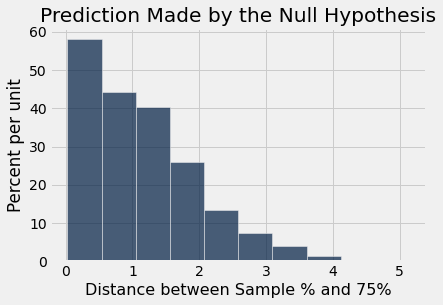

In [6]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.title('Prediction Made by the Null Hypothesis');

Look on the horizontal axis to see the typical values of the distance, as predicted by the model. They are rather small. For example, a high proportion of the distances are in the range 0 to 1, meaning that for a high proportion of the samples, the percent of purple-flowering plants is in the range 75% $\pm$ 1%. That is, the sample percent is in the range 74% to 76%.

Also note that this prediction was made using Mendel's model only, not the proportions observed by Mendel in the plants that he grew. It is time now to compare the predictions and Mendel's observation.

## Step 4. The Conclusion of the Test

The choice between the null and alternative hypotheses depends on the comparison between what you computed in Steps 2 and 3: the observed value of the test statistic and its distribution as predicted by the null hypothesis. 

If the two are not consistent with each other, then the data do not support the null hypothesis. In other words, the alternative hypothesis is better supported by the data. We say that the test *rejects* the null hypothesis.

If the two are consistent with each other, then the observed test statistic is in line with what the null hypothesis predicts. In other words, the null hypothesis is better supported by the data. We say that the data are *consistent with* the null hypothesis.

In our example, the observed value of the test statistic is about 0.89, as computed in Step 2 above. Just by eye, locate roughly where 0.89 is on the horizontal axis of the histogram. You will see that it is clearly in the heart of the distribution predicted by Mendel's model.

The cell below redraws the histogram with the observed value plotted on the horizontal axis.

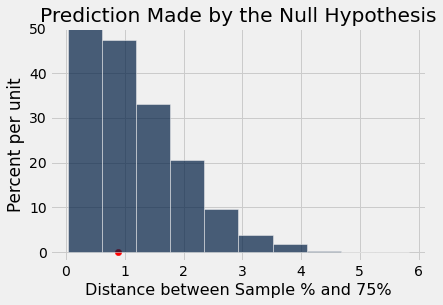

In [19]:
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(observed_statistic, 0, color='red', s=40);

The observed statistic is like a typical distance predicted by the null hypothesis. The null hypothesis is Mendel's model. So our test concludes that the data are consistent with Mendel's model.

Based on our data, Mendel's model looks good.

## The Meaning of "Consistent"

In all of our examples of assessing models there has been no doubt about whether the data were consistent with the model's predictions. They were either very far from what the model predicted, as in the examples about jury panels, or similar to what the model predicted, as in the example about Mendel's model.

But outcomes are not always so clear cut. How far is "far"? Exactly what should "similar" mean? While these questions don't have universal answers, there are some guidelines and conventions that you can follow. 

But first, it is important to understand that whether the observed test statistic is consistent with its predicted distribution under the null hypothesis is a matter of subjective opinion and judgment. We recommend that you provide your judgment along with the value of the test statistic and a graph of its predicted distribution under the null. That will allow your readers to make their own judgment about whether the two are consistent.

In the example above, the judgment is clear. But suppose someone grew another 929 plants of some related variety and wanted to see if Mendel's model worked for plants of that variety too. What would you conclude if their observed distance came out to be 3.2 as shown below?

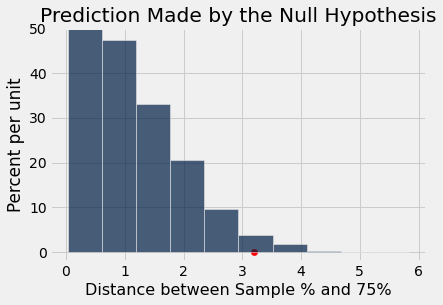

In [24]:
different_observed_statistic = 3.2
Table().with_column(
    'Distance between Sample % and 75%', distances
).hist()
plots.ylim(-0.02, 0.5)
plots.title('Prediction Made by the Null Hypothesis')
plots.scatter(different_observed_statistic, 0, color='red', s=40);

Is the observation based on the new variety of plants consistent with the predictions in the histogram, or not? 

Now the answer is not so clear. It depends on whether you think the red dot is too far from the bulk of the predicted values to be consistent with the prediction based on Mendel's model.

## Conventional Cut-offs and the P-value
If you don't want to use your own judgment, there are conventions that you can follow. These conventions tell us how far out into the tails is conventionally considered "too far". 

The conventions are based on the area in the tail, **starting at the observed statistic (the red dot) and looking in the direction that makes us lean toward the alternative.** In this example that's the right side, because big distances favor the alternative which says that the model isn't good. 

If the area of the tail is small, the observed statistic is far away from the values most commonly predicted by the null hypothesis.

Remember that in a histogram, area represents percent. To find the area in the tail, we have to find the percent of distances that were greater than or equal to 3.2, where the red dot is. The array `distances` contains the averages for all 10,000 repetitions of random sampling under Mendel's model, and `different_observed_statistic` is 3.2.

In [25]:
np.count_nonzero(distances >= different_observed_statistic) / repetitions

0.0243

About 2.4% of the distances simulated under Mendel's model were 3.2 or greater. By the law of averages, we can conclude that if Mendel's model were correct for these new plants, then there is about a 2.4% chance that the test statistic would be 3.2 or more.

That doesn't seem like a big chance. If Mendel's model is true for these plants, something quite unlikely has happened. This idea gives rise to the conventions.

### The p-Value ##

This chance has an impressive name. It is called the *observed significance level* of the test. That's a mouthful, and so it is commonly called the *p-value* of the test. 

**Definition:** The p-value of a test is the chance, based on the model in the null hypothesis, that the test statistic will be equal to the observed value in the sample or even further in the direction that supports the alternative.

If a p-value is small, that means the tail beyond the observed statistic is small and so the observed statistic is far away from what the null predicts. This implies that the data support the alternative hypothesis more than they support the null.  

How small is "small"? According to the conventions:

- If the p-value is less than 5%, it is considered small and the result is called "statistically significant."

- If the p-value is even smaller – less than 1% – the result is called "highly statistically significant."

By this convention, our p-value of 2.4% is considered small. So the conventional conclusion would be to reject the null hypothesis and say that Mendel's model does not look good for the new plants. Formally, the result of the test is statistically significant.

When you make a conclusion in this way, we recommend that you don't just say whether or not the result is statistically significant. Along with your conclusion, provide the observed statistic and the p-value as well, so that readers can use their own judgment.

## Historical Note on the Conventions

The determination of statistical significance, as defined above, has become standard in statistical analyses in all fields of application. When a convention is so universally followed, it is interesting to examine how it arose. 

The method of statistical testing – choosing between hypotheses based on data in random samples – was developed by Sir Ronald Fisher in the early 20th century. Sir Ronald might have set the convention for statistical significance somewhat unwittingly, in the following statement in his 1925 book *Statistical Methods for Research Workers*. About the 5% level, he wrote, "It is convenient to take this point as a limit in judging whether a deviation is to be considered significant or not."

What was "convenient" for Sir Ronald became a cutoff that has acquired the status of a universal constant. No matter that Sir Ronald himself made the point that the value was his personal choice from among many: in an article in 1926, he wrote, "If one in twenty does not seem high enough odds, we may, if we prefer it draw the line at one in fifty (the 2 percent point), or one in a hundred (the 1 percent point). Personally, the author prefers to set a low standard of significance at the 5 percent point ..."

Fisher knew that "low" is a matter of judgment and has no unique definition. We suggest that you too keep this in mind. Provide your data, make your judgment, and explain why you made it.

Whether you use a conventional cutoff or your own judgment, it is important to keep the following points in mind.

- Always provide the observed value of the test statistic and the p-value, so that readers can decide whether or not they think the p-value is small.
- Don't look to defy convention only when the conventionally derived result is not to your liking.
- Even if a test concludes that the data don't support the chance model in the null hypothesis, it typically doesn't explain *why* the model doesn't work. Don't make causal conclusions without further analysis, unless you are running a randomized controlled trial. We will analyze those in a later section.